<a href="https://colab.research.google.com/github/JuanFelipePosada/python-basico_/blob/main/simu_1_control_2024_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  SIMULACION 1: Modelado y análisis de sistemas dinámicos

#### Juan José Montilla Bastidas C.C. 1089478749
#### Juan Felipe Posada Niasa C.C. 1054398182



##### 1. Realizar el modelado matematico de un sistema  masa- resorte-amortiguador con entrada xi y salida xo como el que se muestra en la figura 2

##### 2. Realizar el modelado matematico de un circuito con dos elementos almacenadores de energía con entrada ei y salida eo como se muestra en la figura 3

##### 3. ¿Que analogía puede encontrar entre las funciones de transferencia de los puntos 1 y 2 ?


la analogia que se logra ver a simple vista es que las dos funciones estan en ecuaciones de segundo orden, ademas de que si jugmos algebraicamente con las dos ecuaciones evidenciaremos simulitudes en su estructuras las cuales nos llevaria a concluir que estos dos sistemas son analogos, lo que

#####4. Simular el comportamiento del sistema en lazo abierto y en lazo cerrado, ante excitaciones de tipo impulso y escalon

In [3]:
!pip install control
# Funciones matem´aticas
import numpy as n
# Funciones para graficos
import matplotlib.pyplot as plt
# Funciones parecidas a Matlab
from control.matlab import * # after installing the package, import all its functions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.3 MB/s eta 0:00:00


###### SISTEMA MASA - RESORTE - AMORTIGUADOR

 valores:

*   K1 = 10
*   B1 = 7
*   K2 = 20
*   B2 = 12





In [4]:
#definición del sistema
num=[1.,3.0952,2.3809]
den=[1.,5.9523,2.3809]
ftla= tf(num, den)
print('Funcion de transferencia en LA de la planta:')
print(ftla)
ftlc=feedback(ftla,1)
print("Funcion de transferencia en lazo cerrado: ")
print(ftlc)



Funcion de transferencia en LA de la planta:
<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


s^2 + 3.095 s + 2.381
---------------------
s^2 + 5.952 s + 2.381

Funcion de transferencia en lazo cerrado: 
<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


 s^2 + 3.095 s + 2.381
-----------------------
2 s^2 + 9.047 s + 4.762



/usr/local/lib/python3.10/dist-packages/control/pzmap.py:318: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


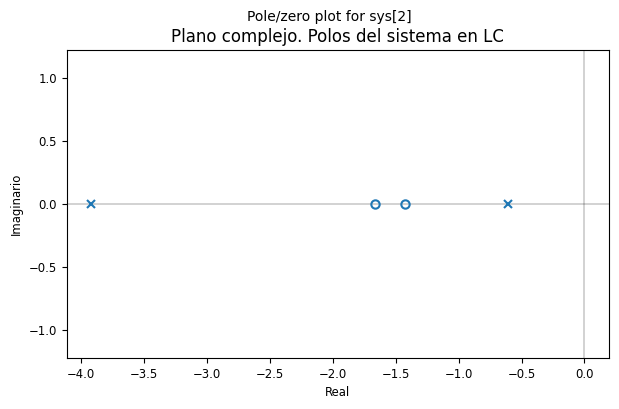

In [5]:
# Grafico de polos y ceros del sistema en lazo cerrado.
plt.figure(1, figsize=[7, 4])
pzmap(ftlc)
plt.xlabel("Real")
plt.ylabel("Imaginario")
plt.title("Plano complejo. Polos del sistema en LC")
plt.show(block=False)


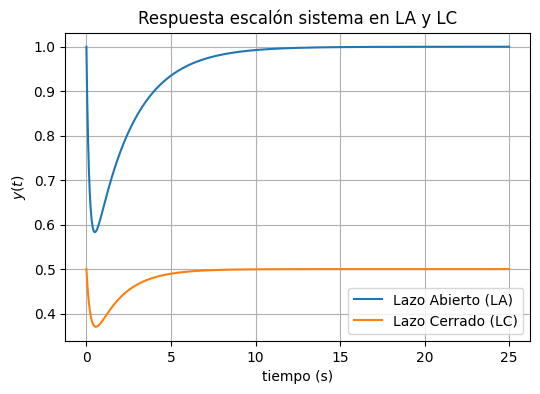

In [6]:
plt.figure(2, figsize=[6, 4])
yout, T = step(ftla, T=25)
yout1, T1 = step(ftlc, T=25)
plt.plot(T.T, yout.T, label="Lazo Abierto (LA)")
plt.plot(T1.T, yout1.T, label="Lazo Cerrado (LC)")
plt.xlabel("tiempo (s)")
plt.ylabel("$y(t)$")
plt.title("Respuesta escalón sistema en LA y LC")
plt.grid()
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/control/timeresp.py:1975: UserWarning: System has direct feedthrough: ``D != 0``. The infinite impulse at ``t=0`` does not appear in the output.
Results may be meaningless!
  warnings.warn("System has direct feedthrough: ``D != 0``. The "


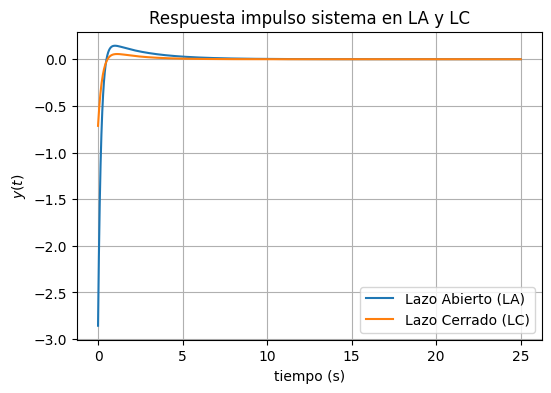

In [7]:
plt.figure(3, figsize=[6, 4])
yout, T = impulse(ftla, T=25)
yout1, T1 = impulse(ftlc, T=25)
plt.plot(T.T, yout.T, label="Lazo Abierto (LA)")
plt.plot(T1.T, yout1.T, label="Lazo Cerrado (LC)")
plt.xlabel("tiempo (s)")
plt.ylabel("$y(t)$")
plt.title("Respuesta impulso sistema en LA y LC")
plt.grid()
plt.legend()
plt.show()


###### SISTEMA CIRCUITO RC

 valores:

*   R1 = 300
*   C1 = 6x10^-6
*   R2 = 550
*   C2 = 10x10^-6

In [8]:
#definición del sistema
num=[7*(10**-6),0.0073,1.]
den=[7*(10**-6),0.0128,1.]
ftla= tf(num, den)
print('Funcion de transferencia en LA de la planta:')
print(ftla)
ftlc=feedback(ftla,1)
print("Funcion de transferencia en lazo cerrado: ")
print(ftlc)



Funcion de transferencia en LA de la planta:
<TransferFunction>: sys[11]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


7e-06 s^2 + 0.0073 s + 1
------------------------
7e-06 s^2 + 0.0128 s + 1

Funcion de transferencia en lazo cerrado: 
<TransferFunction>: sys[13]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


 7e-06 s^2 + 0.0073 s + 1
--------------------------
1.4e-05 s^2 + 0.0201 s + 2



/usr/local/lib/python3.10/dist-packages/control/pzmap.py:318: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


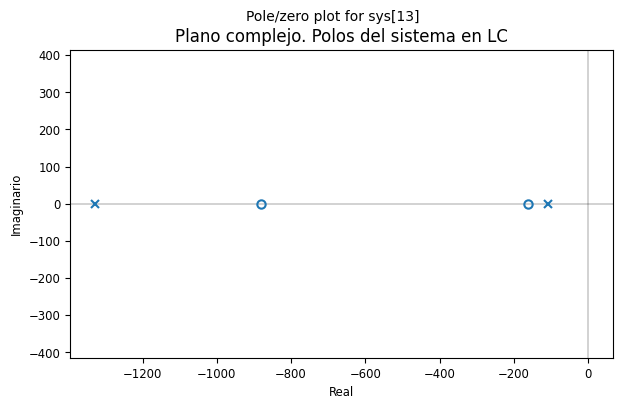

In [9]:
# Grafico de polos y ceros del sistema en lazo cerrado.
plt.figure(1, figsize=[7, 4])
pzmap(ftlc)
plt.xlabel("Real")
plt.ylabel("Imaginario")
plt.title("Plano complejo. Polos del sistema en LC")
plt.show(block=False)


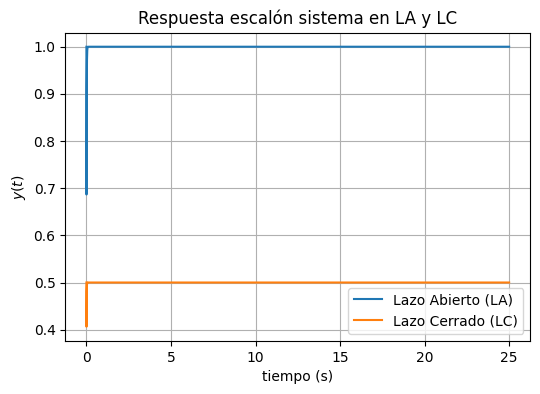

In [10]:
plt.figure(2, figsize=[6, 4])
yout, T = step(ftla, T=25)
yout1, T1 = step(ftlc, T=25)
plt.plot(T.T, yout.T, label="Lazo Abierto (LA)")
plt.plot(T1.T, yout1.T, label="Lazo Cerrado (LC)")
plt.xlabel("tiempo (s)")
plt.ylabel("$y(t)$")
plt.title("Respuesta escalón sistema en LA y LC")
plt.grid()
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/control/timeresp.py:1975: UserWarning: System has direct feedthrough: ``D != 0``. The infinite impulse at ``t=0`` does not appear in the output.
Results may be meaningless!
  warnings.warn("System has direct feedthrough: ``D != 0``. The "


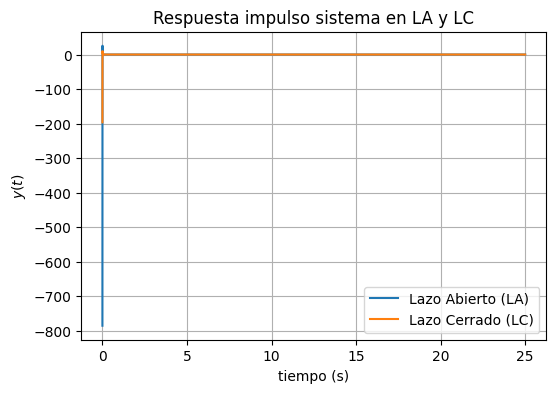

In [11]:
plt.figure(3, figsize=[6, 4])
yout, T = impulse(ftla, T=25)
yout1, T1 = impulse(ftlc, T=25)
plt.plot(T.T, yout.T, label="Lazo Abierto (LA)")
plt.plot(T1.T, yout1.T, label="Lazo Cerrado (LC)")
plt.xlabel("tiempo (s)")
plt.ylabel("$y(t)$")
plt.title("Respuesta impulso sistema en LA y LC")
plt.grid()
plt.legend()
plt.show()


##### 5. Analizar los resultados de cada simulacion

##### 6. Realizar los numerales 4 y 5 para la función de
transferencia de la planta de la ecuacion (13).